# Livro para consulta:
- https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html
- https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html
    

# 1. Importando bibliotecas <a name="import"></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# 2. Carregando o dataframe SINASC <a name="read"></a>
<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [98]:
sinasc_raw = pd.read_csv('SINASC_RO_2019.csv')
sinasc_raw.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


In [99]:
sinasc_raw.columns

Index(['ORIGEM', 'CODESTAB', 'CODMUNNASC', 'LOCNASC', 'IDADEMAE', 'ESTCIVMAE',
       'ESCMAE', 'CODOCUPMAE', 'QTDFILVIVO', 'QTDFILMORT', 'CODMUNRES',
       'GESTACAO', 'GRAVIDEZ', 'PARTO', 'CONSULTAS', 'DTNASC', 'HORANASC',
       'SEXO', 'APGAR1', 'APGAR5', 'RACACOR', 'PESO', 'IDANOMAL', 'DTCADASTRO',
       'CODANOMAL', 'NUMEROLOTE', 'VERSAOSIST', 'DTRECEBIM', 'DIFDATA',
       'DTRECORIGA', 'NATURALMAE', 'CODMUNNATU', 'CODUFNATU', 'ESCMAE2010',
       'SERIESCMAE', 'DTNASCMAE', 'RACACORMAE', 'QTDGESTANT', 'QTDPARTNOR',
       'QTDPARTCES', 'IDADEPAI', 'DTULTMENST', 'SEMAGESTAC', 'TPMETESTIM',
       'CONSPRENAT', 'MESPRENAT', 'TPAPRESENT', 'STTRABPART', 'STCESPARTO',
       'TPNASCASSI', 'TPFUNCRESP', 'TPDOCRESP', 'DTDECLARAC', 'ESCMAEAGR1',
       'STDNEPIDEM', 'STDNNOVA', 'CODPAISRES', 'TPROBSON', 'PARIDADE',
       'KOTELCHUCK', 'CONTADOR', 'munResStatus', 'munResTipo', 'munResNome',
       'munResUf', 'munResLat', 'munResLon', 'munResAlt', 'munResArea'],
      dtype='object')

# Tarefa 2

### 1. Crie 2 faixas de Latitude do município (munResLat) sendo uma acima e outra abaixo de -10.5 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [103]:
#Transformando dados em float
sinasc_raw['munResLat'] = sinasc_raw['munResLat'].astype(float)
#Criando nova coluna
sinasc_raw['Faixa_Latitude'] = sinasc_raw['munResLat'].apply(lambda x: 'Acima de -10.5' if x > -10.5 else 'Abaixo de -10.5')

In [104]:
faixa_latitude = sinasc_raw.groupby('Faixa_Latitude').agg({
    'PESO': ['sum', 'mean', 'min', 'max', 'median', 'std', 'var'],
    'CONSULTAS': ['sum', 'mean', 'min', 'max', 'median', 'std', 'var']
})

faixa_latitude.head()

PESO                                              \
                      sum         mean  min   max  median         std   
Faixa_Latitude                                                          
Abaixo de -10.5  42101809  3240.096121  258  5985  3270.0  531.794694   
Acima de -10.5   45555148  3246.055864  295  5190  3275.0  556.487709   

                               CONSULTAS                                     \
                           var       sum      mean min max median       std   
Faixa_Latitude                                                                
Abaixo de -10.5  282805.596163     48001  3.694090   1   9    4.0  0.643781   
Acima de -10.5   309678.570242     48662  3.467436   1   9    4.0  0.888240   

                           
                      var  
Faixa_Latitude             
Abaixo de -10.5  0.414454  
Acima de -10.5   0.788970

### 2. Crie 2 faixas da área dos municípios (munResArea) sendo uma acima e outra abaixo de 3000 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas


In [106]:
#Transformando dados em float
sinasc_raw['munResArea'] = sinasc_raw['munResArea'].astype(float)
#Criando nova coluna
sinasc_raw['Faixa_Area'] = sinasc_raw['munResArea'].apply(lambda x: 'Acima de 3000' if x > 3000 else 'Abaixo de 3000')

In [107]:
area_municipio = sinasc_raw.groupby('Faixa_Area').agg({
    'APGAR1': ['sum', 'mean', 'min', 'max', 'median', 'std', 'var'],
    'APGAR5': ['sum', 'mean', 'min', 'max', 'median', 'std', 'var']
})
area_municipio.head()

APGAR1                                                  \
                     sum      mean  min   max median       std       var   
Faixa_Area                                                                 
Abaixo de 3000   42079.0  8.073484  0.0  10.0    8.0  1.008775  1.017627   
Acima de 3000   177079.0  8.152808  0.0  10.0    8.0  0.978517  0.957495   

                  APGAR5                                                  
                     sum      mean  min   max median       std       var  
Faixa_Area                                                                
Abaixo de 3000   47570.0  9.130518  0.0  10.0    9.0  0.801138  0.641821  
Acima de 3000   199579.0  9.190836  0.0  10.0    9.0  0.787591  0.620299

### 3. Determine faixas na variável munResAlt e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [108]:
sinasc_raw['munResAlt'] = sinasc_raw['munResAlt'].astype(float)
faixas = pd.cut(sinasc_raw['munResAlt'], bins=4, labels=['Muito baixa', 'Baixa', 'Média', 'Alta'])


In [109]:
agregados = sinasc_raw.groupby(faixas).agg({
    'IDADEMAE': ['sum', 'mean', 'min', 'max', 'median', 'std', 'var'],
    'IDADEPAI': ['sum', 'mean', 'min', 'max', 'median', 'std', 'var']
})
agregados.head()

C:\Users\Matheus Cerqueira\AppData\Local\Temp\ipykernel_2728\3225403981.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  agregados = sinasc_raw.groupby(faixas).agg({


IDADEMAE                                                 IDADEPAI  \
                 sum       mean min max median       std        var       sum   
munResAlt                                                                       
Muito baixa   553269  26.012930  11  52   25.0  6.400508  40.966496  149506.0   
Baixa         100205  26.369737  13  53   26.0  6.323463  39.986186   76211.0   
Média           9733  26.448370  14  47   26.0  6.484738  42.051823    4975.0   
Alta           42030  26.433962  14  46   26.0  6.310937  39.827921    5806.0   

                                                                
                  mean   min   max median       std        var  
munResAlt                                                       
Muito baixa  31.160067  15.0  73.0   30.0  7.852575  61.662929  
Baixa        30.817226  16.0  86.0   30.0  7.647825  58.489234  
Média        30.151515  16.0  53.0   30.0  7.439681  55.348854  
Alta         34.152941  18.0  60.0   34.0  6.812807  46.414340

### 4. Plote no mesmo grafico ao longo do tempo a idade media das mulheres de cada regiao imediatas de rondonia


In [56]:
imediatas = {
    "Candeias do Jamari": "Porto Velho",
    "Guajará-Mirim": "Porto Velho",
    "Itapuã do Oeste": "Porto Velho",
    "Nova Mamoré": "Porto Velho",
    "Porto Velho": "Porto Velho",
    "Ariquemes": "Ariquemes",
    "Alto Paraíso": "Ariquemes",
    "Buritis": "Ariquemes",
    "Cacaulândia": "Ariquemes",
    "Campo Novo de Rondônia": "Ariquemes",
    "Cujubim": "Ariquemes",
    "Monte Negro": "Ariquemes",
    "Rio Crespo": "Ariquemes",
    "Jaru": "Jaru",
    "Governador Jorge Teixeira": "Jaru",
    "Machadinho D'Oeste": "Jaru",
    "Theobroma": "Jaru",
    "Vale do Anari": "Jaru",
    "Alvorada D'Oeste": "Ji-Paraná",
    "Costa Marques": "Ji-Paraná",
    "Ji-Paraná": "Ji-Paraná",
    "Mirante da Serra": "Ji-Paraná",
    "Nova União": "Ji-Paraná",
    "Ouro Preto do Oeste": "Ji-Paraná",
    "Presidente Médici": "Ji-Paraná",
    "São Francisco do Guaporé": "Ji-Paraná",
    "São Miguel do Guaporé": "Ji-Paraná",
    "Seringueiras": "Ji-Paraná",
    "Teixeirópolis": "Ji-Paraná",
    "Urupá": "Ji-Paraná",
    "Vale do Paraíso": "Ji-Paraná",
    "Cacoal": "Cacoal",
    "Alta Floresta D'Oeste": "Cacoal",
    "Alto Alegre dos Parecis": "Cacoal",
    "Castanheiras": "Cacoal",
    "Espigão D'Oeste": "Cacoal",
    "Ministro Andreazza": "Cacoal",
    "Nova Brasilândia D'Oeste": "Cacoal",
    "Novo Horizonte do Oeste": "Cacoal",
    "Parecis": "Cacoal",
    "Pimenta Bueno": "Cacoal",
    "Primavera de Rondônia": "Cacoal",
    "Rolim de Moura": "Cacoal",
    "Santa Luzia D'Oeste": "Cacoal",
    "São Felipe D'Oeste": "Cacoal",
    "Vilhena": "Vilhena",
    "Cabixi": "Vilhena",
    "Cerejeiras": "Vilhena",
    "Chupinguaia": "Vilhena",
    "Colorado do Oeste": "Vilhena",
    "Corumbiara": "Vilhena",
    "Pimenteiras do Oeste": "Vilhena"
}

In [111]:
# Mapear os municípios para as regiões imediatas
sinasc_raw['Regiao_Imediata'] = sinasc_raw['munResNome'].map(imediatas)

# Converter data de nascimento para datetime
sinasc_raw['DTNASC'] = pd.to_datetime(sinasc_raw['DTNASC'])

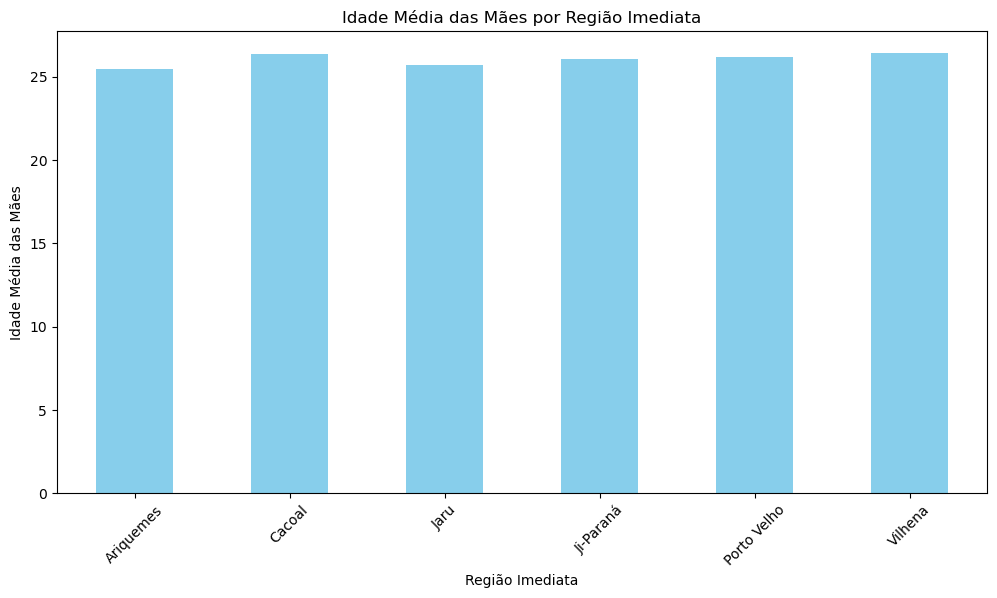

In [112]:
# Agrupar por região imediata e calcular a idade média das mães
media_idade_regiao = sinasc_raw.groupby('Regiao_Imediata')['IDADEMAE'].mean()

# Plotar
plt.figure(figsize=(12, 6))
media_idade_regiao.plot(kind='bar', color='skyblue')
plt.title('Idade Média das Mães por Região Imediata')
plt.xlabel('Região Imediata')
plt.ylabel('Idade Média das Mães')
plt.xticks(rotation=45)
plt.show()

### 5. Utilize a tabela do link abaixo e crie faixas utilizando o mapping e gere agrupamentos utilizando essas faixas como chave


### 5.1 IDH
A - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IDH-M


In [113]:
idh = {
    "Porto Velho": "Alto",
    "Vilhena": "Alto",
    "Cacoal": "Alto",
    "Ji-Paraná": "Alto",
    "Pimenta Bueno": "Alto",
    "Ariquemes": "Alto",
    "Jaru": "Médio",
    "Colorado do Oeste": "Médio",
    "Ouro Preto do Oeste": "Médio",
    "Espigão D'Oeste": "Médio",
    "Santa Luzia D'Oeste": "Médio",
    "Pimenteiras do Oeste": "Médio",
    "Presidente Médici": "Médio",
    "Castanheiras": "Médio",
    "Guajará-Mirim": "Médio",
    "Cabixi": "Médio",
    "Candeias do Jamari": "Médio",
    "São Felipe D'Oeste": "Médio",
    "Cacaulândia": "Médio",
    "São Miguel do Guaporé": "Médio",
    "Mirante da Serra": "Médio",
    "Alvorada d'Oeste": "Médio",
    "Teixeirópolis": "Médio",
    "Nova Brasilândia D'Oeste": "Médio",
    "Rio Crespo": "Médio",
    "Primavera de Rondônia": "Médio",
    "Alta Floresta D'Oeste": "Médio",
    "Ministro Andreazza": "Médio",
    "Novo Horizonte do Oeste": "Médio",
    "Vale do Paraíso": "Médio",
    "Alto Paraíso": "Médio",
    "Parecis": "Médio",
    "Buritis": "Médio",
    "Itapuã do Oeste": "Médio",
    "Corumbiara": "Médio",
    "Cujubim": "Médio",
    "Costa Marques": "Médio",
    "São Francisco do Guaporé": "Médio",
    "Urupá": "Médio",
    "Monte Negro": "Médio",
    "Seringueiras": "Baixo",
    "Governador Jorge Teixeira": "Baixo",
    "Machadinho D'Oeste": "Baixo",
    "Campo Novo de Rondônia": "Baixo",
    "Alto Alegre dos Parecis": "Baixo",
    "Theobroma": "Baixo",
    "Nova União": "Baixo",
    "Nova Mamoré": "Baixo",
    "Vale do Anari": "Baixo",
}

In [132]:
sinasc_raw['IDH'] = sinasc_raw['munResNome'].map(idh)

#Analisando dados pelo IDH
idh_municipio = sinasc_raw.groupby('IDH').aggregate({'IDADEMAE': ['mean', 'median'], 'IDADEPAI': ['mean', 'median'], 'QTDFILVIVO': ['mean', 'median'],'QTDFILMORT': ['mean', 'median'], })
idh_municipio.head()

IDADEMAE          IDADEPAI        QTDFILVIVO        QTDFILMORT       
            mean median       mean median       mean median       mean median
IDH                                                                          
Alto   26.261678   26.0  31.236319   30.0   1.044870    1.0   0.273072    0.0
Baixo  25.326944   25.0  30.617450   30.0   1.072664    1.0   0.249406    0.0
Médio  25.857918   25.0  31.230298   30.0   1.095289    1.0   0.260797    0.0

### 5.2 IFDM
B - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IFDM


In [116]:
ifdm= {
    "Ariquemes": "Moderado",
    "Vilhena": "Moderado",
    "Pimenta Bueno": "Moderado",
    "Porto Velho": "Moderado",
    "Ji-Paraná": "Moderado",
    "Cacoal": "Moderado",
    "Santa Luzia D'Oeste": "Moderado",
    "Rolim de Moura": "Moderado",
    "Chupinguaia": "Moderado",
    "São Miguel do Guaporé": "Moderado",
    "Pimenteiras do Oeste": "Moderado",
    "Teixeirópolis": "Moderado",
    "Colorado do Oeste": "Moderado",
    "Jaru": "Moderado",
    "Rio Crespo": "Moderado",
    "Primavera de Rondônia": "Moderado",
    "Alta Floresta D'Oeste": "Moderado",
    "Ouro Preto do Oeste": "Moderado",
    "São Francisco do Guaporé": "Moderado",
    "Candeias do Jamari": "Moderado",
    "Buritis": "Moderado",
    "São Felipe d'Oeste": "Moderado",
    "Presidente Médici": "Moderado",
    "Cerejeiras": "Moderado",
    "Monte Negro": "Moderado",
    "Urupá": "Moderado",
    "Espigão D'Oeste": "Regular",
    "Seringueiras": "Regular",
    "Alvorada D'Oeste": "Regular",
    "Itapuã do Oeste": "Regular",
    "Cabixi": "Regular",
    "Novo Horizonte do Oeste": "Regular",
    "Nova Brasilândia D'Oeste": "Regular",
    "Vale do Paraíso": "Regular",
    "Corumbiara": "Regular",
    "Alto Paraíso": "Regular",
    "Cacaulândia": "Regular",
    "Vale do Anari": "Regular",
    "Ministro Andreazza": "Regular",
    "Costa Marques": "Regular",
    "Nova União": "Regular",
    "Guajará-Mirim": "Regular",
    "Mirante da Serra": "Regular",
    "Parecis": "Regular",
    "Castanheiras": "Regular",
    "Theobroma": "Regular",
    "Machadinho D'Oeste": "Regular",
    "Campo Novo de Rondônia": "Regular",
    "Nova Mamoré": "Regular",
    "Cujubim": "Regular",
    "Alto Alegre dos Parecis": "Regular",
    "Governador Jorge Teixeira": "Regular",   
}

In [131]:
sinasc_raw['IFDM'] = sinasc_raw['munResNome'].map(ifdm)

#Analisando dados pelo IFDM
ifdm_municipio = sinasc_raw.groupby('IFDM').aggregate({'IDADEMAE': ['mean', 'median'], 'IDADEPAI': ['mean', 'median'], 'QTDFILVIVO': ['mean', 'median'],'QTDFILMORT': ['mean', 'median'], })
ifdm_municipio.head()

IDADEMAE          IDADEPAI        QTDFILVIVO        QTDFILMORT  \
               mean median       mean median       mean median       mean   
IFDM                                                                        
Moderado  26.222501   26.0  31.059090   30.0   1.027956    1.0   0.270796   
Regular   25.535131   25.0  31.237509   30.0   1.164372    1.0   0.250616   

                 
         median  
IFDM             
Moderado    0.0  
Regular     0.0

### 5.3 PIB
C - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_PIB


In [95]:
pib= {
    "Porto Velho": "Acima de 1 bilhão",
    "Ji-Paraná": "Acima de 1 bilhão",
    "Vilhena": "Acima de 1 bilhão",
    "Ariquemes": "Acima de 1 bilhão",
    "Cacoal": "Acima de 1 bilhão",
    "Jaru": "Acima de 1 bilhão",
    "Rolim de Moura": "Acima de 1 bilhão",
    "Pimenta Bueno": "Acima de 1 bilhão",
    "Guajará-Mirim": "Acima de 500 milhões",
    "Ouro Preto do Oeste": "Acima de 500 milhões",
    "Buritis": "Acima de 500 milhões",
    "Machadinho do Oeste": "Acima de 500 milhões",
    "Espigão D'Oeste": "Acima de 500 milhões",
    "São Miguel do Guaporé": "Acima de 500 milhões",
    "Candeias do Jamari": "Acima de 500 milhões",
    "Nova Mamoré": "Acima de 500 milhões",
    "Cerejeiras": "Acima de 500 milhões",
    "Alta Floresta do Oeste": "Acima de 300 milhões",
    "Presidente Médici": "Acima de 300 milhões",
    "Cujubim": "Acima de 300 milhões",
    "Nova Brasilândia do Oeste": "Acima de 300 milhões",
    "Alto Paraíso": "Acima de 300 milhões",
    "São Francisco do Guaporé": "Acima de 300 milhões",
    "Colorado do Oeste": "Acima de 300 milhões",
    "Monte Negro": "Acima de 200 milhões",
    "Alto Alegre dos Parecis": "Acima de 200 milhões",
    "Campo Novo de Rondônia	": "Acima de 200 milhões",
    "Alvorada do Oeste": "Acima de 200 milhões",
    "Chupinguaia": "Acima de 100  milhões",
    "Corumbiara": "Acima de 100  milhões",
    "Ministro Andreazza": "Acima de 100  milhões",
    "Urupá": "Acima de 100  milhões",
    "Costa Marques": "Acima de 100  milhões",
    "Seringueiras": "Acima de 100  milhões",
    "Mirante da Serra": "Acima de 100  milhões",
    "Governador Jorge Teixeira": "Acima de 100  milhões",
    "Theobroma": "Acima de 100  milhões",
    "Santa Luzia do Oeste": "Acima de 100  milhões",
    "Novo Horizonte do Oeste": "Acima de 100  milhões",
    "Itapuã do Oeste": "Acima de 100  milhões",
    "Vale do Paraíso": "Acima de 100  milhões",
    "Cacaulândia": "Acima de 100  milhões",
    "Cabixi": "Acima de 100  milhões",
    "Vale do Anari": "Acima de 100  milhões",
    "Nova União": "Até 100 milhões",
    "Parecis": "Até 100 milhões",
    "Rio Crespo": "Até 100 milhões",
    "Pimenteiras do Oeste": "Até 100 milhões",
    "Teixeirópolis": "Até 100 milhões",
    "São Felipe do Oeste": "Até 100 milhões",
    "Castanheiras": "Até 100 milhões",
    "Primavera de Rondônia": "Até 100 milhões",   
}

In [133]:
sinasc_raw['PIB'] = sinasc_raw['munResNome'].map(pib)

#Analisando dados do PIB
pib_municipio = sinasc_raw.groupby('PIB').aggregate({'IDADEMAE': ['mean', 'median'], 'IDADEPAI': ['mean', 'median'], 'QTDFILVIVO': ['mean', 'median'],'QTDFILMORT': ['mean', 'median'], })
pib_municipio.head()

IDADEMAE          IDADEPAI        QTDFILVIVO         \
                            mean median       mean median       mean median   
PIB                                                                           
Acima de 1 bilhão      26.265562   26.0  31.108387   30.0   1.026435    1.0   
Acima de 100  milhões  25.638424   25.0  31.744348   31.0   0.992320    1.0   
Acima de 200 milhões   25.297450   25.0  30.129630   29.0   0.953488    1.0   
Acima de 300 milhões   25.706070   25.0  30.819149   30.0   1.062097    1.0   
Acima de 500 milhões   25.822292   25.0  31.322482   31.0   1.250926    1.0   

                      QTDFILMORT         
                            mean median  
PIB                                      
Acima de 1 bilhão       0.270229    0.0  
Acima de 100  milhões   0.239824    0.0  
Acima de 200 milhões    0.220238    0.0  
Acima de 300 milhões    0.251828    0.0  
Acima de 500 milhões    0.306042    0.0

### Analise as respostas encontradas, tire algum insight delas, conte pra gente algo encontrado nos dados.

Exemplo:
- Ah, descobri que a idade mediana das mulheres que deram a luz no ano de 2019 dos municipios com o PIB mais alto é a maior dentre todas.

-> Áreas onde o o IDH maior tendem a ter Mãe e Pais com média de idades maiores

-> A mediana da idade dos pais se encontram em regiões de PIB acima de 500 milhões e acima de 1 bilhão